In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### 이미지 읽고 쓰기 (imshow,imwrite)

In [24]:
img_path = 'img/actor.jpg'
img = cv.imread(img_path)
cv.imshow('img',img)
cv.waitKey()
cv.destroyWindow('img')

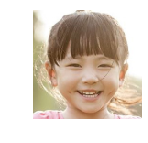

In [31]:
# jupyter에 바로 띄우기.
img = cv.imread('img/smile.png')
plt.figure(figsize=(2, 2))
plt.axis('off')
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)) # opencv(BGR) matplot(RGB)
plt.show()

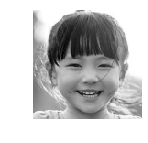

In [32]:
# grayscale로 열기
img_g = cv.imread('img/smile.png', cv.IMREAD_GRAYSCALE)
cv.imwrite('girl_gray.jpg',img_g) # 이미지 저장
plt.figure(figsize=(2, 2))
plt.axis('off')
# cmap = colormap / matlib은 RGB형태를 받아들이기 때문에 컬러맵을 설정해야함.
plt.imshow(img_g,cmap='gray')
plt.show()

### 동영상, 카메라 프레임 읽고 속성 확인

In [44]:
# 영상 읽고 출력
cap_path = 'img/big_buck.avi'
cap = cv.VideoCapture(cap_path)
if cap.isOpened(): # 객체 초기화
    while True:
        ret, img = cap.read() # 다음 프레임 읽기
        if ret: # ret:프레임 읽기 성공 또는 실패
            cv.imshow(cap_path,img)
            cv.waitKey(25) # 25ms
        else:
            break
    print("end")
cap.release() # 객체 자원 반납
cv.destroyAllWindows()

##### 웹캠 이용 #####
cap = cv2.VideoCapture(0) # 0번 카메라
if cap.isOpened():
    while True:
        ret, img = cap.read() 
        if ret:
            cv2.imshow('camera', img)
            if cv2.waitKey(1) != -1:
                break
        else:
            print('no frame')
            break
else:
    print("can't open camera.")
cap.release()
cv2.destroyAllWindows()

end


In [53]:
# 영상 속성 확인
cap_path = 'img/big_buck.avi'
def viedo_properties(*args):
    video = cv.VideoCapture(*args)
    print('프레임', video.get(cv.CAP_PROP_FRAME_COUNT))
    print('width', video.get(cv.CAP_PROP_FRAME_WIDTH))
    print('height', video.get(cv.CAP_PROP_FRAME_WIDTH))

viedo_properties(cap_path)

프레임 558.0
width 852.0
height 852.0


In [57]:
## 첫번째 프레임 가져와서 출력
cap = cv.VideoCapture(cap_path)
capture, frame = cap.read()
cv.imshow('1',frame)
cv.waitKey()
cv.destroyAllWindows()

## 100번째 프레임 가져와서 출력
cap = cv.VideoCapture(cap_path)
cap.set(cv.CAP_PROP_POS_FRAMES,100)
capture, frame = cap.read()
cv.imshow('2',frame)
cv.waitKey()
cv.destroyAllWindows()

### 여러 도형 그리기
- 선, 사각형, 다각형, 원, 텍스트

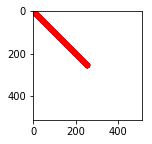

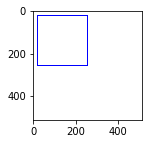

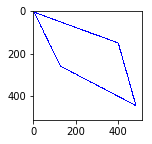

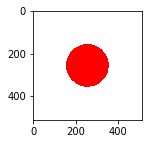

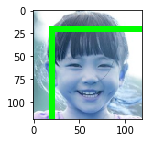

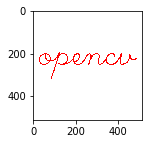

In [32]:
# 512*512의 도화지를 만든다.
img = np.full((512,512,3),255,np.uint8)
# 선을 그리기.
img = cv.line(img, (0,0),(255,255),(255,0,0),30,cv.LINE_AA)
plt.figure(figsize=(2, 2))
plt.imshow(img)

# 사각형 그리기
img_sq = np.full((512,512,3),255,np.uint8)
img_sq = cv.rectangle(img_sq, (20,20),(255,255),(0,0,255),5)
plt.figure(figsize=(2, 2))
plt.imshow(img_sq)

# 다각형 그리기
img = np.full((512,512,3),255,np.uint8)
points = np.array([[5,5],[128,258],[483,444],[400,150]])
img = cv.polylines(img,[points],True,(0,0,255),4)
plt.figure(figsize=(2, 2))
plt.imshow(img)
plt.show()

# 원 그리기
img = np.full((512,512,3),255,np.uint8)
img = cv.circle(img,(255,255),100,(255,0,0),-1)
plt.figure(figsize=(2, 2))
plt.imshow(img)
plt.show()

# 특정 사진 위에 그리기
img_b = cv.imread('img/smile.png')
img_bsq = cv.rectangle(img_b, (20,20),(255,255),(0,255,0),5)
plt.figure(figsize=(2, 2))
plt.imshow(img_bsq)

# 텍스트 넣기
img_t = np.full((512,512,3),255,np.uint8)
img_t = cv.putText(img_t,'opencv',(30,250),cv.FONT_HERSHEY_SCRIPT_SIMPLEX,5.5,(255,0,0),3)
plt.figure(figsize=(2, 2))
plt.imshow(img_t)

### 이름있는 창선언 및 키보드 마우스 이벤트

In [ ]:
import cv2 as cv
img_ = cv.imread('img/smile.png',cv.IMREAD_GRAYSCALE)
# 일반적인 창으로 사진 열기
cv.namedWindow('gray',cv.WINDOW_NORMAL)
# cv.moveWindow(title, x좌표 , y좌표) : 창위치 이동
# cv.resizeWindow(title, width, height) : 창 크기 변경
# cv.destroyWindow(title) : 창 닫기
# cv.destroyAllWindows(): 열린 모든 창 닫기
cv.imshow('gray',img_)
cv.waitKey()
cv.destroyAllWindows()

In [4]:
import cv2 as cv
# 키보드 이벤트 받아서 윈도우 위치 변경
x,y = 100,100
img__ = cv.imread('img/smile.png',cv.IMREAD_GRAYSCALE)
cv.namedWindow('gray',cv.WINDOW_NORMAL)
while True:
    cv.imshow('gray',img__)
    cv.moveWindow('gray', x,y)
    if cv.waitKey() == ord('a'):
        x -= 10
    elif cv.waitKey() == ord('s'):
        y += 10
    elif cv.waitKey() == ord('d'):
        x += 10
    elif cv.waitKey() == ord('w'):
        y -= 10
    else :
        cv.destroyAllWindows()
        break

In [1]:
# 마우스 이벤트
import numpy as np   # for zeros
import cv2 as cv
import random        # for randrange

mouse_is_pressing = False   # 왼쪽 마우스 버튼 상태 체크
drawing_mode = False       # 현재 그리기 모드 선택을 위해 사용 ( 원 / 사각형 )
start_x, start_y = -1, -1   # 최초로 왼쪽 마우스 버튼 누른 위치를 저장하기 위해 사용
color = (0, 0, 0)   # 도형 내부 채울때 사용할 색 지정시 사용 ( 초기값은 흰색 )

def mouse_callback(event,x,y,flags,param):
    global color, start_x, start_y, drawing_mode, mouse_is_pressing
    
    # 마우스의 이동을 감지해 도형을 그림
    if event == cv.EVENT_MOUSEMOVE:
        if mouse_is_pressing == True: # 마우스 왼쪽 버튼을 누르고있는지 체크
            if flags & cv.EVENT_FLAG_SHIFTKEY and flags & cv.EVENT_FLAG_CTRLKEY: 
                    color = (0,255,0) #블루
                # 마우스 이벤트 포함 컨트롤이 눌렸을 경우
            elif flags & cv.EVENT_FLAG_SHIFTKEY: 
                color = (255,0,0) #그린
            # 시프트가 눌렸을경우
            elif flags & cv.EVENT_FLAG_CTRLKEY: 
                color = (0,0,255) #레드

            if drawing_mode == True: # 이동된 마우스 커서 위치를 반영하여 사각형/윈을 그림
                cv.rectangle(img,(start_x,start_y),(x,y),color,-1)
            else:
                # ALT 눌렸을때
                cv.circle(img, (start_x,start_y), max(abs(start_x - x), abs(start_y - y)), color, -1)
                
    # 마우스가 처음 눌렸을때 초기화
    elif event == cv.EVENT_LBUTTONDOWN:
        start_x, start_y = x, y     # 최초로 왼쪽 마우스 버튼 누른 위치를 저장 
        mouse_is_pressing = True     # 왼쪽 마우스 버튼을 누른 것 감지 
    
    # 마우스 이벤트가 끝날때
    elif event == cv.EVENT_LBUTTONUP: 
        mouse_is_pressing = False
        if drawing_mode == True:  # 최종 위치에 마우스 커서 위치를 반영하여 사각형/윈을 그림
            cv.rectangle(img,(start_x,start_y),(x,y),color,-1)
        else:
            cv.circle(img, (start_x,start_y), max(abs(start_x - x), abs(start_y - y)), color, -1)
        color = (0, 0, 0)


img = np.full((512,512,3),255,np.uint8)
cv.namedWindow('image')   
cv.setMouseCallback('image', mouse_callback) 

while(1):
    cv.imshow('image',img)
    k = cv.waitKey(1) & 0xFF
    if k == ord('m'): # m 누르면 그리기 모드 변경( 사각형 / 원 ) 
        drawing_mode = not drawing_mode
    elif k == 27: 
        break

cv.destroyAllWindows() 

### 트랙바로 RGB값 변경

In [3]:
import cv2 as cv
import numpy as np
wn = 'track'
img = np.full((512,512,3),255,np.uint8)
cv.imshow(wn,img)

# 크랙바 콜백 함수 선언
def Track_callback(x):
    r = cv.getTrackbarPos('R',wn)
    g = cv.getTrackbarPos('G',wn)
    b = cv.getTrackbarPos('B',wn)
    img[:] = [b,g,r]
    cv.imshow(wn,img)

# 특정 창에 트랙바 추가
cv.createTrackbar('R',wn,255,255,Track_callback)
cv.createTrackbar('G',wn,255,255,Track_callback)
cv.createTrackbar('B',wn,255,255,Track_callback)

while(1):
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
cv.destroyAllWindows()